In [1]:
import pandas as pd
import plotly
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', 110)
pd.set_option('display.max_rows', 200)
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

# Reading CSV

In [2]:
listing = pd.read_csv('CSV/listings.csv')
reviews = pd.read_csv('CSV/reviews.csv')

# Part I: How do prices change based on location ?

- Price prepocessing

In [3]:
# Converting price column to float
listing['price'] = listing['price'].astype(str)

In [4]:
def func_remove_character(x, character):
    """ Returns string with the character removed
    
    Args:
        x (str): The string that will have the character removed
        character (str): character to be removed from x
    
    Returns:
        String with the symbol removed
    
    """
    return x.replace(character, '')

In [5]:
listing['price'] = listing.price.apply(lambda x: func_remove_character(str(x), '$'))
listing['price'] = listing.price.apply(lambda x: func_remove_character(str(x), ','))

In [6]:
listing['price'] = listing['price'].astype(float)

- Analyzing Price distribution

In [7]:
listing['price'].describe() # 75% of price values is below 600.

count    34754.000000
mean       645.688180
std       1674.245213
min          0.000000
25%        155.000000
50%        298.000000
75%        600.000000
max      41966.000000
Name: price, dtype: float64

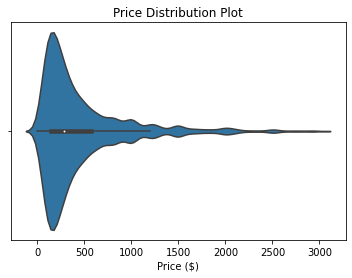

In [8]:
ax = sns.violinplot(x=listing.loc[listing['price'] < 3000, 'price']);
ax.set_title('Price Distribution Plot');
ax.set_xlabel('Price ($)');
ax.figure.savefig('price_distribution.png')

Some listings contains a price with value zero, which is, clearly, a mistake. This values are dropped from the dataset since there are few of them.

In [9]:
listing.loc[listing['price'] <= 0, 'price']

19690    0.0
20191    0.0
20207    0.0
20208    0.0
20213    0.0
20214    0.0
20234    0.0
Name: price, dtype: float64

In [10]:
listing.drop(listing.loc[listing['price'] <= 0].index, axis = 0, inplace = True)

Since price is not well distributed, a binning technique will be applied in order to better analyze data. The values below were in order to keep similar distributions between classes:
- 0: [0, 100]
- 1: (100,150]
- 2: (150, 200]
- 3: (200, 250]
- 4: (250, 300]
- 5: (300, 400]
- 6: (400, 600]
- 7: (600, 1000]
- 8: (1000, 100000] # the maximum price of the dataset is 41966.0


In [11]:
bins_price = [0, 100, 150, 200, 250, 300, 400, 600, 1000, 100000] 
price_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8]

In [12]:
listing['price_bins'] = pd.cut(listing['price'], bins_price, labels = price_labels, include_lowest = True)

In [13]:
listing['price_bins'] = listing['price_bins'].astype(int)

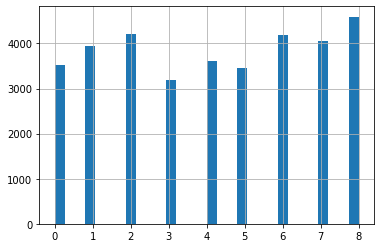

In [14]:
listing['price_bins'].hist(bins = 30);

## Price VS Location

Analyzing different values for host_neighbourhood

In [15]:
len(listing['host_neighbourhood'].value_counts())

163

In order to analyze price for diffenrent neibourhoods, the column price_bins was used instead of the price column, since its well distributed between each class, therefore the mean will be less sensitive to outliers.  

In [16]:
listing.groupby('host_neighbourhood').agg({'price_bins': 'mean'}).sort_values(by = 'price_bins')

price_bins
host_neighbourhood                           
Almagro                              0.000000
Vila Kosmos                          0.000000
Honório Gurgel                       0.000000
Vigário Geral                        0.000000
Jacaré                               0.000000
Jardim América                       0.000000
Kilmainham                           0.000000
Sion                                 0.000000
Oswaldo Cruz                         0.000000
Bonsucesso                           0.294118
Colégio                              0.333333
Barros Filho                         0.400000
Abolição                             0.500000
LB of Brent                          0.500000
Penha Circular                       0.500000
Parada de Lucas                      0.750000
Brás de Pina                         0.761905
Marechal Hermes                      0.800000
El Raval                             1.000000
Caju                                 1.000000
Alto do Pina                         1.000000
Trastevere                           1.000000
Holland Park                         1.000000
Sampaio                              1.545455
Penha                                1.647059
Olaria                               1.750000
Estacio                              1.754098
Centro                               1.759615
Lins de Vasconcelos                  1.764706
Inhaúma                              1.833333
Todos os Santos                      1.960000
Cordovil                             2.000000
Anchieta                             2.000000
Tomás Coelho                         2.000000
Grajaú                               2.017857
Encantado                            2.090909
Catumbi                              2.142857
Lapa                                 2.193202
Engenho Novo                         2.193548
São Cristóvão                        2.252632
Cachambi                             2.285714
Cascadura                            2.444444
Santo Cristo                         2.454545
Irajá                                2.461538
Del Castilho                         2.484848
Vila Olímpia                         2.500000
Saúde                                2.500000
Gamboa                               2.545455
Flamengo                             2.640704
Retiro                               2.666667
Bento Ribeiro                        2.714286
Santa Teresa                         2.757823
Maria da Graça                       2.777778
Parque Anchieta                      2.800000
Praça da Bandeira                    2.811321
Engenho da Rainha                    2.833333
Madureira                            2.833333
Complexo da Maré                     2.833333
Glória                               2.926829
Rio Comprido                         2.955882
Catete                               2.960000
Pilares                              3.000000
Montmartre                           3.000000
Financial District                   3.000000
Cidade Nova                          3.000000
Manly                                3.000000
Santo Antonio                        3.000000
Le Marais                            3.000000
Vila Clementino                      3.000000
Williamsburg                         3.000000
Piedade                              3.111111
Méier                                3.125000
Quintino Bocaiúva                    3.200000
Botafogo                             3.203098
Barra de Guaratiba                   3.272727
Vidigal                              3.288591
Tijuca                               3.295652
Rocha Miranda                        3.333333
Laranjeiras                          3.339583
Cosme Velho                          3.348485
Guadalupe                            3.400000
Ramos                                3.428571
Rocinha                              3.454545
Châtelet - Les Halles - Beaubourg    3.500000
Deodoro                              3.500000
Rocha                            

There are 163 different neighbourhoods, which makes the analysis difficult based on the price_bins mean for every single neighbourhood. There is also the problem that some neighbourhoods, only contains one sample, which can cause wrong intuitions about the location average price (clusterizing some locations could be one solution, but it isn't the best approache).

One way to come across this problem was to make a visual analysis.

In [17]:
# In order to use the function below, you must have a public token to use the map-ox api. Check more on: https://www.mapbox.com
px.set_mapbox_access_token('pk.eyJ1IjoiZGFuaWVsZGFjb3N0YSIsImEiOiJjazZzMGZ0c3gwYncwM2tzNW51d3B2ajUyIn0.U6j8vTW4kIJal4aBWEyDtQ')
fig = px.scatter_mapbox(listing, lat='latitude', lon='longitude', color='price_bins', size_max=20, zoom=9)
fig.show()

In [18]:
# Print Screen from image above, for visualization on GitHub:

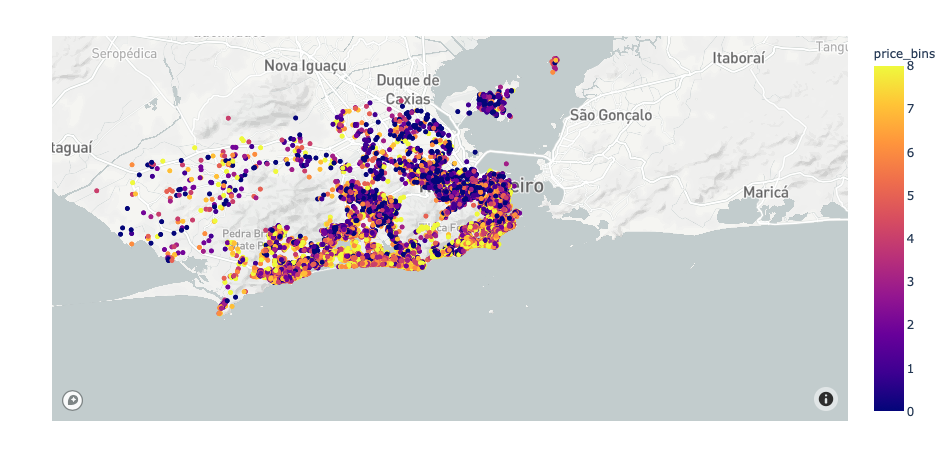

In [19]:
from IPython.display import Image
Image(filename='Images/price_location.PNG')

From the image above, it's possible to observe that the houses price tends to be higher when closer to beaches. 
For those people that are more familiar with Rio de Janeiro geography: we can also observe that the price is also higher, in average, for the most famous neighbourhoods: Leblon, Ipanema, Lagoa and Barra da Tijuca.

# Part II: Does the host response rate affect his scores ?

- Preprocessing host_response_rate & review_scores_rating

Checking of null values.

In [20]:
listing['host_response_rate'].isnull().sum()

11907

There are 11907 null values for the column host_response_rate. There isn't a way to fill up this huge gap. Therefore, the analysis will be done with the rest of the dataset, which isn't a poor analysis, but not a perfect one either, since there are still 16434 samples. 

In [21]:
# Creating a new dataset with the non null values of host_response_rate and review_scores_rating
response_and_score = listing.loc[(~listing.host_response_rate.isna()) & (~listing.review_scores_rating.isna())]

In [22]:
func_clean_response = lambda x: int(str(x).replace('%', ''))

In [23]:
# removing character '%' from host_response_rate
response_and_score['host_response_rate'] = response_and_score.host_response_rate.apply(lambda x:  func_remove_character(str(x), '%'))
response_and_score['host_response_rate'] = response_and_score['host_response_rate'].astype(int)

In [24]:
response_and_score.loc[response_and_score['review_scores_rating'] == 100]

id                            listing_url       scrape_id  \
30        85807     https://www.airbnb.com/rooms/85807  20200121213543   
41        90907     https://www.airbnb.com/rooms/90907  20200121213543   
42        92107     https://www.airbnb.com/rooms/92107  20200121213543   
43        94895     https://www.airbnb.com/rooms/94895  20200121213543   
53       107469    https://www.airbnb.com/rooms/107469  20200121213543   
...         ...                                    ...             ...   
34303  41475574  https://www.airbnb.com/rooms/41475574  20200121213543   
34319  41485520  https://www.airbnb.com/rooms/41485520  20200121213543   
34321  41489362  https://www.airbnb.com/rooms/41489362  20200121213543   
34357  41516746  https://www.airbnb.com/rooms/41516746  20200121213543   
34409  41548020  https://www.airbnb.com/rooms/41548020  20200121213543   

      last_scraped                                               name  \
30      2020-01-22                    Ipanema Copa Posto 6 Studio Rio   
41      2020-01-22           COPACABANA Best Location! - 3 min from ️   
42      2020-01-22                     Lovely room in Jardim Botânico   
43      2020-01-22                                          temporada   
53      2020-01-22     COMFORTABLE ROOM WITH BEAUTIFUL PANORAMIC VIEW   
...            ...                                                ...   
34303   2020-01-22                        Quarto lindo em Copacabana!   
34319   2020-01-22  Charmoso studio Santa Clara , próximo praia po...   
34321   2020-01-22                       Cobertura Duplex com Piscina   
34357   2020-01-22                                       Club verdant   
34409   2020-01-22                Bedroom in Humaitá - Rio de Janeiro   

                                                 summary  \
30     This self-catering apartment is conveniently l...   
41     Modern silent apartment in best location only ...   
42     Quarto para até 2 pessoas em camas de solteiro...   
43     Meu apartamento é muito bem localizado. A rua ...   
53     It is a bedroom comfortable and is located on ...   
...                                                  ...   
34303  OLÁ!  Nossa casa conta com uma sala ampla com ...   
34319  Aconchegante Studio, ideal para um casal , loc...   
34321  Cobertura Nova no Recreio dos bandeirantes pro...   
34357                                                  H   
34409                                                NaN   

                                                   space  \
30     Very nice apartment renovated and located on t...   
41     Modern silent apartment in best location only ...   
42     Room for 2 persons the most. One bed and one m...   
43     quarto arejado, claro, próximo à praia, elevad...   
53     Our happiness is to share our home with all th...   
...                                                  ...   
34303  Os hóspedes alugando um de nossos quartos pode...   
34319                                                NaN   
34321  Tudo limpo e Arejado. Cortina de Vidro. Piscin...   
34357          quarto casal (suite)ou quarto de solteiro   
34409  Our apartment is very comfortable, near to man...   

                                             description experiences_offered  \
30     This self-catering apartment is conveniently l...                none   
41     Modern silent apartment in best location only ...                none   
42     Room for 2 persons the most. One bed and one m...                none   
43     Meu apartamento é muito bem localizado. A rua ...                none   
53     It is a bedroom comfortable and is located on ...                none   
...                                                  ...                 ...   
34303  OLÁ!  Nossa casa conta com uma sala ampla com ...                none   
34319  Aconchegante Studio, ideal para um casal , loc...                none   
34321  Cobertura Nova no Recreio dos bandeirantes pro...                none   
34357

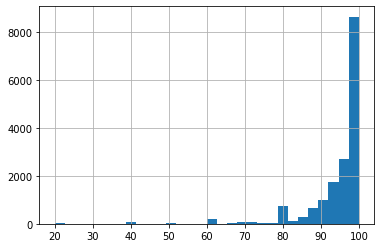

In [25]:
response_and_score.review_scores_rating.hist(bins = 30);

As observed above, the host_response_rate has very imbalanced distribuition, which can cause a misleading analysis. Just like it was done for the column price, a binning thecnique will also be applied to this column.

- 0 : [0, 0.96]
- 1: (0.96, 100]

In [26]:
score_bins = [0, 96, 100]
score_labels = [0, 1]

In [27]:
response_and_score['review_scores_rating_bins'] =pd.cut(response_and_score['review_scores_rating'], score_bins, labels = score_labels, include_lowest = True)

In [28]:
response_and_score['review_scores_rating_bins'] = response_and_score['review_scores_rating_bins'].astype(int)

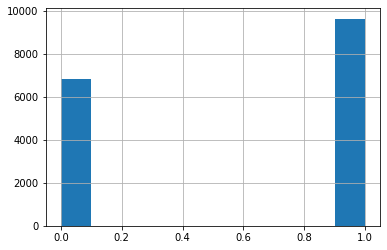

In [29]:
response_and_score['review_scores_rating_bins'].hist();

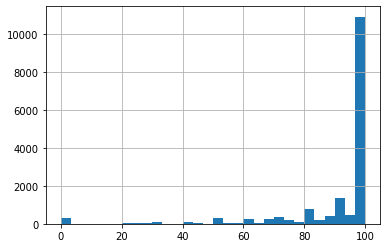

In [30]:
response_and_score['host_response_rate'].hist(bins = 30);

The same technique will be applied for host_response_rate. In this case, the technique is applied in order to facilitate the analysis:
- 0: [0, 10]
- 1: (10, 20]
- 2: (20, 30]
- 3: (30, 40]
- 4: (40, 50]
- 5: (50, 60]
- 6: (60, 70]
- 7: (70, 80]
- 8: (80, 90]
- 9: (90, 100]

In [31]:
response_rate_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90,100]
response_rate_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [32]:
response_and_score['host_response_rate_bins'] = pd.cut(response_and_score['host_response_rate'], response_rate_bins, labels = response_rate_labels, include_lowest = True)

In [33]:
response_and_score.groupby('host_response_rate_bins').agg({'review_scores_rating_bins':'mean'}).reset_index()

host_response_rate_bins  review_scores_rating_bins
0                       0                   0.599369
1                       1                   0.595238
2                       2                   0.578947
3                       3                   0.614130
4                       4                   0.560322
5                       5                   0.578014
6                       6                   0.542636
7                       7                   0.528649
8                       8                   0.574247
9                       9                   0.594645

The result shows that the review scores rating isn't affected by the host response rate. The conclusion goes against the premise that this two variables would be directly proportional. The conclusion isn't an absurde, since not everyone cares about the host response rate, there are more important factors that influences the review scores rate: location, price, hostpitality, home cleanliness and etc.

# Part III: Airbnb growth through the years

Based on the datasets available, the **review.csv** is the one that has the best features to retrieve this information. The dataset contains the date of each review. Therefore, this analysis will be based on the number of reviews per day. The assumption that it's made here, is that most of people leaves a review after a stay. 

After a quick research I found that approximately 60%-70% of guests leaves a review

In [34]:
# Checking for null values
reviews.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         76
dtype: int64

Prepocessing date column and grouping reviews by month. A monthly window was chosen for analysis.

In [35]:
# Convert datime format
func_datetime = lambda x: str(x)[:7]

In [36]:
reviews['date'] = reviews.date.apply(func_datetime)

In [37]:
reviews['date'] = pd.to_datetime(reviews['date'])

In [38]:
reviews['month'] = reviews['date'].dt.month

In [39]:
reviews['year'] = reviews['date'].dt.year

In [40]:
reviews = reviews.sort_values(by = 'date').reset_index(drop = True)

In [41]:
reviews_time_series = reviews.groupby(['date', 'month', 'year']).agg({'listing_id': 'count'}).reset_index()

In [42]:
reviews_time_series.rename(columns = {'listing_id': 'total_reviews'}, inplace = True)

In [43]:
# Checking if all months are presented in every year
reviews_time_series.groupby('year').month.count()

year
2010     7
2011    12
2012    12
2013    12
2014    12
2015    12
2016    12
2017    12
2018    12
2019    12
2020     1
Name: month, dtype: int64

In [44]:
reviews_time_series.set_index('date', inplace = True)

In [45]:
reviews_time_series.head()

month  year  total_reviews
date                                  
2010-06-01      6  2010              1
2010-07-01      7  2010              4
2010-08-01      8  2010              4
2010-09-01      9  2010              7
2010-10-01     10  2010              5

Plotting time series. Total_reviews vs date(month)

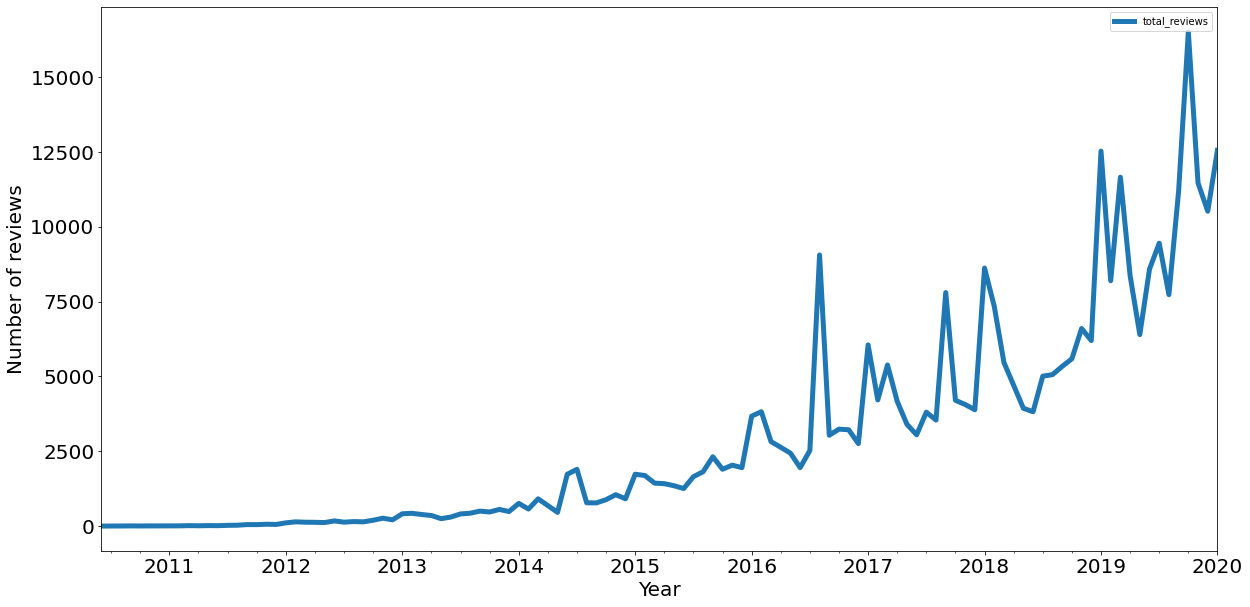

In [56]:
reviews_time_series.plot(y = 'total_reviews', linewidth = 5, fontsize = 20, figsize = (20,10));
plt.ylabel('Number of reviews', fontsize = 20);
plt.xlabel('Year', fontsize = 20);

From the table below, it's possible to analyze in which month the maximum number of total_reviews per year happened. Some months obtained a high number of reviews for not an explicity reason, but for August 2016, we can explain that the total amount of 9062 reviews where due to the Rio Olympic Games, that was held from 5 to 21 August 2016.

In [70]:
reviews_time_series[reviews_time_series.groupby('year').total_reviews.transform(max) == reviews_time_series['total_reviews']]

month  year  total_reviews
date                                  
2010-09-01      9  2010              7
2010-11-01     11  2010              7
2010-12-01     12  2010              7
2011-11-01     11  2011             63
2012-11-01     11  2012            265
2013-11-01     11  2013            557
2014-07-01      7  2014           1898
2015-09-01      9  2015           2318
2016-08-01      8  2016           9062
2017-09-01      9  2017           7806
2018-01-01      1  2018           8624
2019-10-01     10  2019          16515
2020-01-01      1  2020          12557

From the time series above it's possible to observe a trend. In the following graph the trend was extract from the time series by taking a rolling average, which means that, for each time point, the average of the points is taken on either side of it. For the window size, a window of 12 months was used, in order to observe yearly seasonality.

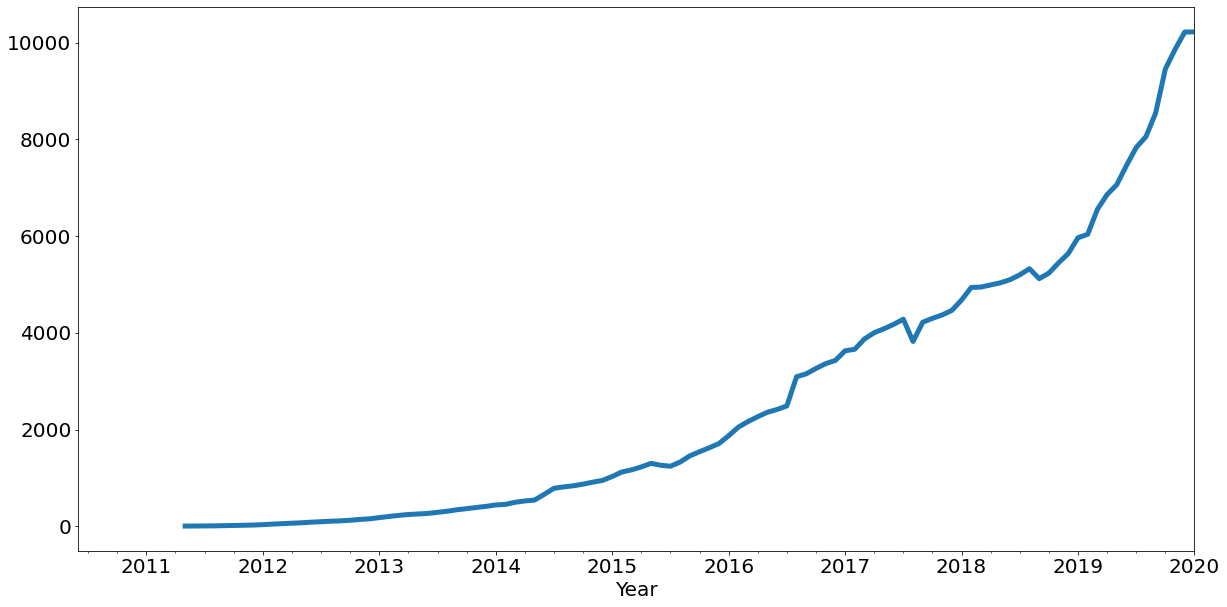

In [47]:
# Checking the existing of a trend
reviews_time_series.total_reviews.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

For analyzing seasonality, we must remove the trend. A "differencing" method was used to obtain the seasonality, as presented below. Nevertheless, the graph below wasn't promising, it's not clear what is the time series seasonality

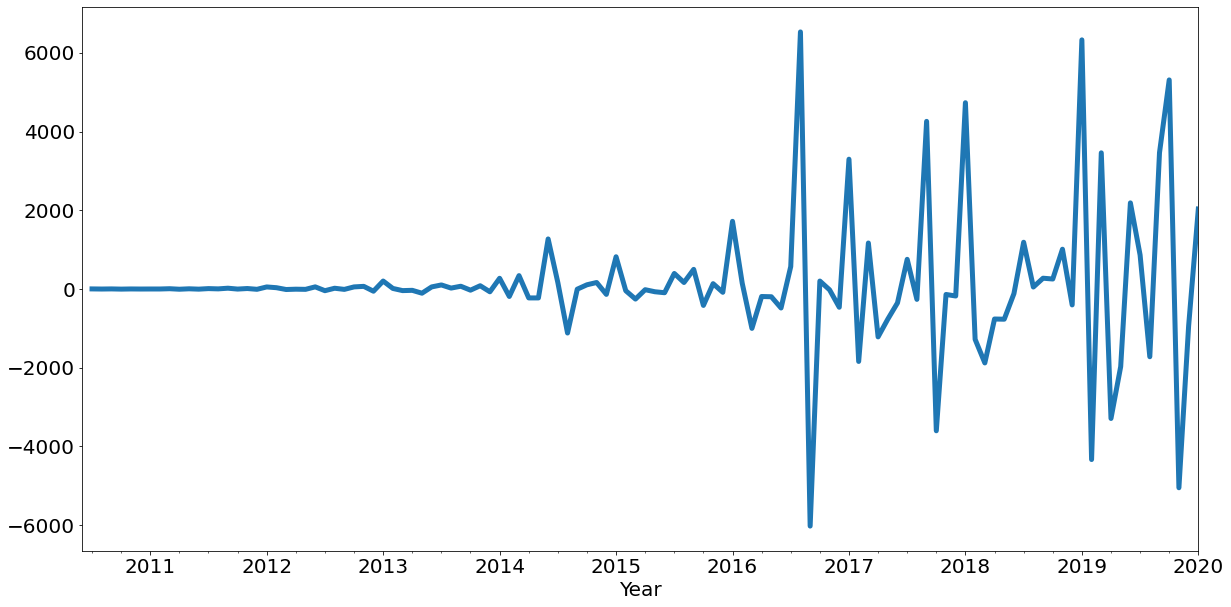

In [48]:
# Checking the existing of seasonality
reviews_time_series.total_reviews.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

From the box plot below it's possible to analyze that january has a higher mean value when compared other months, which can be explained by the fact that this period correponds to summer season in Rio de Janeiro 

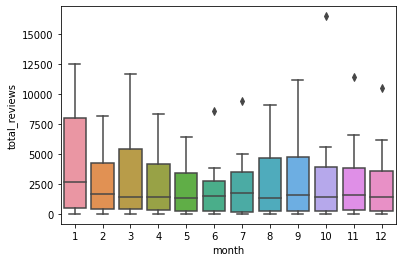

In [49]:
sns.boxplot(x = 'month', y = 'total_reviews', data = reviews_time_series);

Based on a yearly seasonality what is expected to analyze from an autocorrelation plot is a spike at 12 months, meaning that the time series is correlated with itself shifted by twelve months.

From the autocorrelation plot we observe that, the time series is correlated (with a 95% confidence interval ) to its 24 past months. This result isn't very clear, and a further study is required for better conclusions.

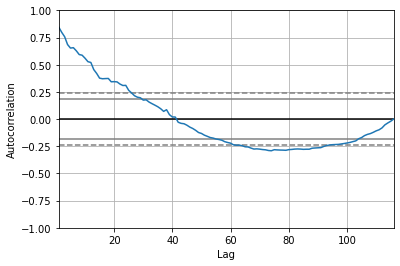

In [50]:
pd.plotting.autocorrelation_plot(reviews_time_series['total_reviews']);

# Part IV: How do prices change based on the number of accommodates ?

In [51]:
listing['accommodates'].describe()

count    34747.000000
mean         4.202233
std          2.606418
min          1.000000
25%          2.000000
50%          4.000000
75%          5.000000
max        160.000000
Name: accommodates, dtype: float64

For higher accomodates, that less sample it has. 

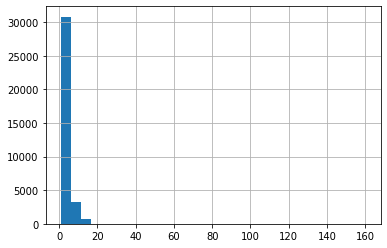

In [52]:
listing['accommodates'].hist(bins = 30);

Values that are bigger than 16 are getting groupped together

In [53]:
listing.loc[listing['accommodates'] >= 16,'accommodates'] = 16

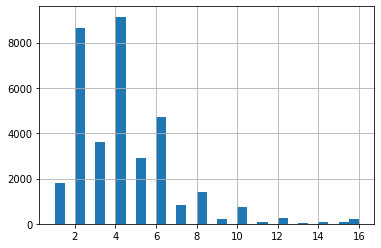

In [54]:
listing['accommodates'].hist(bins = 30);

As suspect, the variables are directly proportional. 

In [55]:
listing.groupby('accommodates').agg({'price_bins': 'mean'})

price_bins
accommodates            
1               1.633371
2               2.687710
3               3.130326
4               4.386003
5               4.964359
6               5.706570
7               5.880141
8               6.402817
9               6.049550
10              6.721845
11              6.065574
12              6.644531
13              6.538462
14              6.642857
15              6.723077
16              6.100877